In [ ]:
import numpy as np
import pandas as pd
import pickle
pdDf = pd.read_excel('/data1.xlsx')
pdDf.head()
mata=(pd.read_excel('/data1.xlsx',sheet_name=0))
matb=(pd.read_excel('/data1.xlsx',sheet_name=1))
pdDf = pdDf.dropna(axis=1)

In [ ]:
pdDf

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [ ]:
pdDf.columns

Index(['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)',
       'Payment (Rs)'],
      dtype='object')

In [ ]:
one=pdDf[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']]
one=np.array(one)

In [ ]:
two=pdDf['Payment (Rs)']

In [ ]:
target_val=mata.iloc[:,4]
target_val
remain_val=mata.iloc[:,1:4]
remain_val

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [ ]:
arr1= target_val.to_numpy()
arr2= remain_val.to_numpy()
print(arr2)

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]


In [ ]:
one

array([[20,  6,  2],
       [16,  3,  6],
       [27,  6,  2],
       [19,  1,  2],
       [24,  4,  2],
       [22,  1,  5],
       [15,  4,  2],
       [18,  4,  2],
       [21,  1,  4],
       [16,  2,  4]])

In [ ]:
two

0    386
1    289
2    393
3    110
4    280
5    167
6    271
7    274
8    148
9    198
Name: Payment (Rs), dtype: int64

rank of matrix a

In [ ]:
rank = np.linalg.matrix_rank(one)
print("Rank of the given Matrix is : ",rank)


Rank of the given Matrix is :  3


In [ ]:
rank = np.linalg.matrix_rank(two)
print("Rank of the given Matrix is : ",rank)

Rank of the given Matrix is :  1


In [ ]:
np.linalg.pinv(one)

array([[-0.01008596, -0.03124505,  0.01013951,  0.0290728 ,  0.0182907 ,
         0.01161794, -0.00771348,  0.00095458,  0.01743623, -0.00542016],
       [ 0.09059668,  0.07263726,  0.03172933, -0.09071908, -0.01893196,
        -0.06926996,  0.05675464,  0.03152577, -0.07641966,  0.00357352],
       [ 0.00299878,  0.15874243, -0.05795468, -0.06609024, -0.06295043,
         0.03348017,  0.01541831, -0.01070461,  0.00029003,  0.05938755]])

***A2.Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.***

In [ ]:
one=np.linalg.pinv(one)

In [ ]:
Z=np.matmul(one,two)
Z

array([ 1., 55., 18.])

In [ ]:
Z.shape

(3,)

a3

In [ ]:
pdDf['classify'] = pdDf['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200  else 'POOR');

KeyError: ignored

In [ ]:
pdDf

0      Tue
1      Mon
2      Fri
3      Thu
4      Wed
      ... 
244    Tue
245    Mon
246    Fri
247    Thu
248    Wed
Name: Day, Length: 249, dtype: object

A4

In [ ]:
pdDf=pd.read_excel('/data1.xlsx',sheet_name=1)
pdDf

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [ ]:
pdDf['Price'].mean()

1560.6634538152612

In [ ]:
pdDf['Price'].var()

58732.36535253918

In [ ]:
pdDf1=pdDf.loc[pdDf['Day']=="Wed"]
pdDf1['Price'].mean()

1550.7060000000001

**Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations.**

In [ ]:
pdDf2=pdDf.loc[pdDf['Month']=="Apr"]
pdDf2['Price'].mean()



1698.9526315789474

**From the Chg% (available in column I) find the probability of making a loss over the stock. (Suggestion: use lambda function to find negative values**

In [ ]:
pdDf['classify'] = pdDf['Chg%'].apply(lambda x: 'PROFIT' if x > 0  else 'LOSS');

In [ ]:
pdDf1=pdDf.loc[pdDf['classify']=="PROFIT"]

In [ ]:
rowsa=len(pdDf1.axes[0])

In [ ]:
rowsa

124

In [ ]:
pdDf2=pdDf.loc[pdDf['classify']=="LOSS"]
rowsb=len(pdDf2.axes[0])
rowsb

125

In [ ]:
prob_loss=np.divide(rowsb,(rowsa+rowsb))
prob_loss

0.5020080321285141

**Calculate the probability of making a profit on Wednesday**

In [ ]:
pdDf1=pdDf.loc[(pdDf['classify']=="PROFIT") & (pdDf['Day']=="Wed")]
pdDf1
rows=len(pdDf1.axes[0])
rows

21

In [ ]:
prob_profit=np.divide(rows,(rowsa+rowsb))
prob_profit

0.08433734939759036

conditional prob

In [ ]:
pdDf1=pdDf['Day']
rows3=len(pdDf1.axes[0])
pdDf2=pdDf.loc[pdDf['Day']=="Wed"]
rows4=len(pdDf2.axes[0])
prob_wen=np.divide(rows4,rows3)
prob_wen

0.20080321285140562

CODE CONVERSION

In [ ]:
pdDf1=pdDf.loc[(pdDf['classify']=="PROFIT") & (pdDf['Day']=="Wed")]
pdDf1
rows=len(pdDf1.axes[0])
rows
prob_profit=np.divide(rows,(rowsa+rowsb))
prob_profit

0.08433734939759036

combine both

In [ ]:
prob_profit_wed=np.divide(prob_profit,prob_wen)
prob_profit_wed

0.42

scatter plot

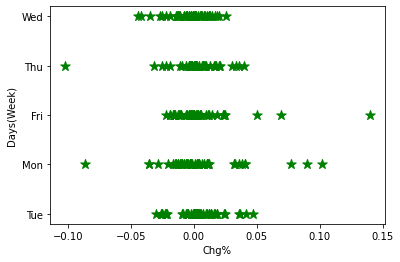

In [ ]:
from matplotlib import pyplot as plt
chg=pdDf['Chg%'].to_numpy()
week=pdDf['Day'].to_numpy()
week
plt.scatter(chg,week,marker='*', s=100,c='green')
plt.ylabel("Days(Week)")
plt.xlabel("Chg%")
plt.show()